In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import datetime
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 0. Problem Formulation

1. What are the busiest times of the year to visit Seattle? By how much do prices spike?
2. Can you describe the vibe of each Seattle neighborhood using listing descriptions?
3. What are the factors influencing review score?

# 1. Data Extraction and Exploratroy Analysis

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
listing = pd.read_csv('listings.csv')
listing.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [5]:
listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [6]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
calendar.describe(include='all')

,listing_id,date,available,price
count,1.393570e+06,1393570,1393570,934542
unique,NaN,365,2,669
top,NaN,2016-06-30,t,$150.00
freq,NaN,3818,934542,36646
mean,5.550111e+06,NaN,NaN,NaN
std,2.962274e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.258213e+06,NaN,NaN,NaN
50%,6.118244e+06,NaN,NaN,NaN
75%,8.035212e+06,NaN,NaN,NaN


In [9]:
calendar_reduced=calendar.drop(['price'],axis=1)

In [10]:
calendar_reduced=calendar_reduced.groupby(['date','available']).count()

In [11]:
calendar_reduced

listing_id
date       available            
2016-01-04 f                2083
           t                1735
2016-01-05 f                1951
           t                1867
2016-01-06 f                1992
...                          ...
2016-12-31 t                2859
2017-01-01 f                 896
           t                2922
2017-01-02 f                1042
           t                2776

[730 rows x 1 columns]

In [12]:
calendar_reduced["avail_to_unavail_ratio"] = calendar_reduced.groupby(level=0)['listing_id'].transform(lambda x: x[1]/ x[0])
calendar_reduced=calendar_reduced.drop('listing_id',axis=1)
calendar_reduced=calendar_reduced.reset_index(level=1, drop=True)
calendar_reduced=calendar_reduced.drop_duplicates()
calendar_reduced

,avail_to_unavail_ratio
date,
2016-01-04,0.832933
2016-01-05,0.956945
2016-01-06,0.916667
2016-01-07,0.869736
2016-01-08,0.875246
...,...
2016-12-29,2.884028
2016-12-30,2.903885
2016-12-31,2.981230


<AxesSubplot:xlabel='date', ylabel='avail_to_unavail_ratio'>

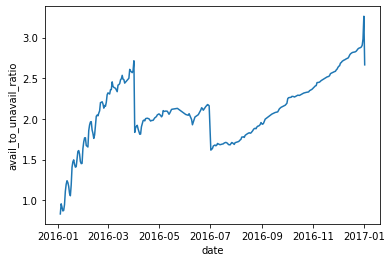

In [13]:
calendar_reduced.reset_index(level=0, inplace=True)
calendar_reduced['date']  = pd.to_datetime(calendar_reduced['date'])
sns.lineplot(x="date", y="avail_to_unavail_ratio", data= calendar_reduced)

In [14]:
calendar_reduced_2=calendar.drop(['available','listing_id'],axis=1)
calendar_reduced_2=calendar_reduced_2.dropna(how='any')


In [15]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

<AxesSubplot:xlabel='date', ylabel='price'>

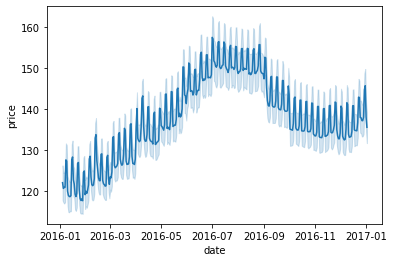

In [16]:
calendar_reduced_2['price'] = calendar_reduced_2['price'].apply(clean_currency).astype('float')
calendar_reduced_2.groupby(['date']).mean()
calendar_reduced_2['date']  = pd.to_datetime(calendar_reduced_2['date'])
sns.lineplot(x="date", y="price", data= calendar_reduced_2)

- Question 1: The Seattle Airbnb is busiest during the summer, from July to Aug. 
- Question 2: The price increases on average about 10% during that time.

In [17]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [18]:
listing.shape

(3818, 92)

In [19]:
listing_reduced=listing[['id','name','summary','description','neighborhood_overview','neighbourhood_group_cleansed','property_type','room_type','review_scores_rating']]

In [20]:
listing_reduced.head()

,id,name,summary,description,neighborhood_overview,neighbourhood_group_cleansed,property_type,room_type,review_scores_rating
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,NaN,Queen Anne,Apartment,Entire home/apt,95.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",Queen Anne,Apartment,Entire home/apt,96.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Queen Anne,House,Entire home/apt,97.0
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,A charming apartment that sits atop Queen Anne...,NaN,Queen Anne,Apartment,Entire home/apt,NaN
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Queen Anne,House,Entire home/apt,92.0


In [21]:
neighbourhood=listing_reduced.groupby('neighbourhood_group_cleansed')

In [22]:
neighbourhood.mean().sort_values(by="review_scores_rating",ascending=False).head(10)

,id,review_scores_rating
neighbourhood_group_cleansed,,
Central Area,5.587679e+06,96.009404
West Seattle,5.752459e+06,95.864198
Delridge,5.217371e+06,95.861538
Ballard,5.180190e+06,95.533679
Queen Anne,5.921983e+06,95.443089
Seward Park,5.548881e+06,95.025641
Rainier Valley,5.282222e+06,94.731343
Northgate,5.566178e+06,94.692308
Other neighborhoods,5.235195e+06,94.562500


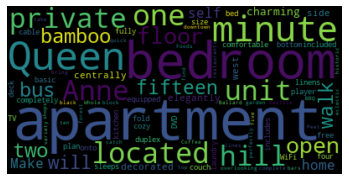

In [28]:
text = listing_reduced.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
neighbourhood.mean().sort_values(by="review_scores_rating",ascending=False).head(10)

,id,review_scores_rating
neighbourhood_group_cleansed,,
Central Area,5.587679e+06,96.009404
West Seattle,5.752459e+06,95.864198
Delridge,5.217371e+06,95.861538
Ballard,5.180190e+06,95.533679
Queen Anne,5.921983e+06,95.443089
Seward Park,5.548881e+06,95.025641
Rainier Valley,5.282222e+06,94.731343
Northgate,5.566178e+06,94.692308
Other neighborhoods,5.235195e+06,94.562500


In [47]:
listing_reduced.neighbourhood_group_cleansed.unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [50]:
neighbourhood=listing_reduced.neighbourhood_group_cleansed.unique()

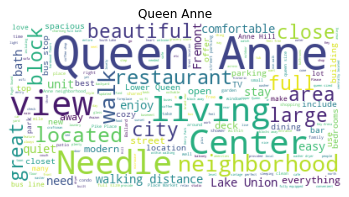

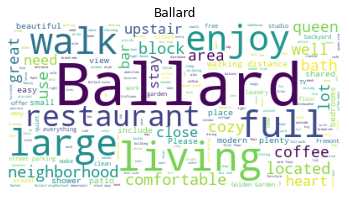

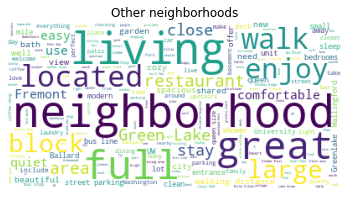

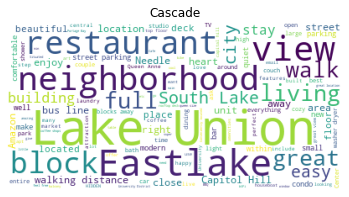

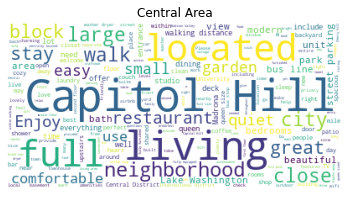

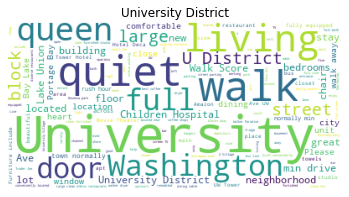

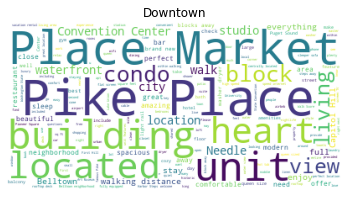

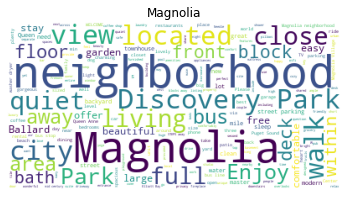

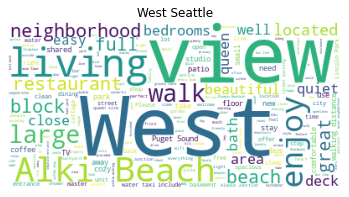

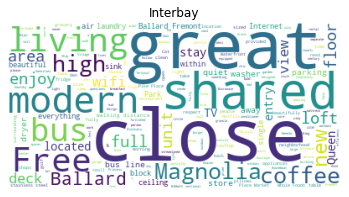

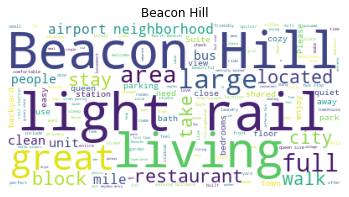

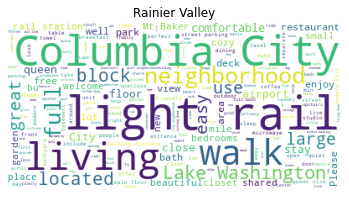

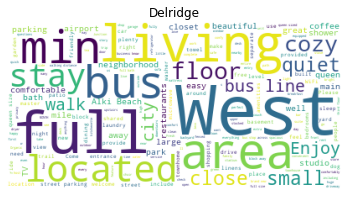

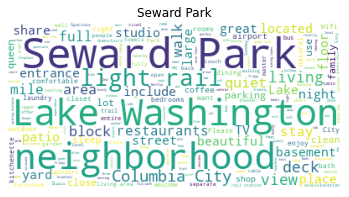

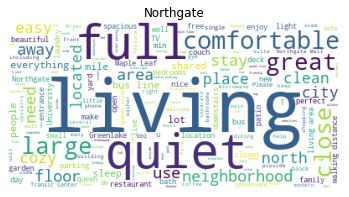

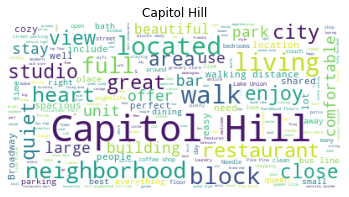

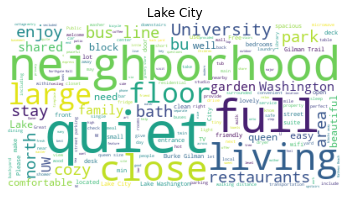

In [53]:
for n in neighbourhood:  
    text = listing_reduced[listing_reduced['neighbourhood_group_cleansed']==n].description.values
    stopwords = set(STOPWORDS)
    stopwords.update(["house", "Seattle", "seattle", "home", "room","access","bedroom","kitchen","apartment","one","will","one","guest","minute","private","downtown","space","bed","two","bathroom","guests","minutes","available"])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(text))
    plt.title(n)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Question 2 anwer above

# Modeling - Data cleaning

In [175]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [176]:
listing_df=listing[['host_id','host_since','host_response_time','host_response_rate','host_about','host_acceptance_rate','host_is_superhost',
                    'room_type','host_neighbourhood','host_listings_count','host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified',
                    'neighbourhood_cleansed',
                    'neighbourhood_group_cleansed','zipcode','is_location_exact','property_type','room_type','accommodates','bathrooms','bedrooms','beds',
                    'bed_type','amenities','square_feet','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included',
                    'extra_people','minimum_nights','maximum_nights','calendar_updated','has_availability','availability_30','availability_60','availability_90',
                    'availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                    'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','cancellation_policy',
                    'instant_bookable','requires_license','require_guest_profile_picture','require_guest_phone_verification','calculated_host_listings_count',
                    'reviews_per_month']]

In [177]:
listing_df.head()

,host_id,host_since,host_response_time,host_response_rate,host_about,host_acceptance_rate,host_is_superhost,room_type,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,instant_bookable,requires_license,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,956883,2011-08-11,within a few hours,96%,"I am an artist, interior designer, and run a s...",100%,f,Entire home/apt,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,f,f,2,4.07
1,5177328,2013-02-21,within an hour,98%,Living east coast/left coast/overseas. Time i...,100%,t,Entire home/apt,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,t,t,6,1.48
2,16708587,2014-06-12,within a few hours,67%,i love living in Seattle. i grew up in the mi...,100%,f,Entire home/apt,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,f,f,2,1.15
3,9851441,2013-11-06,NaN,NaN,NaN,NaN,f,Entire home/apt,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,$100.00,$650.00,"$2,300.00",NaN,NaN,1,$0.00,1,1125,6 months ago,t,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,f,f,f,f,1,NaN
4,1452570,2011-11-29,within an hour,100%,"Hi, I live in Seattle, Washington but I'm orig...",NaN,f,Entire home/apt,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$450.00,NaN,NaN,$700.00,$125.00,6,$15.00,1,1125,7 weeks ago,t,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,f,f,f,f,1,0.89


In [178]:
listing_df.shape

(3818, 57)

In [179]:
np.sum(listing_df.isnull())/listing_df.shape[0]

host_id                             0.000000
host_since                          0.000524
host_response_time                  0.136983
host_response_rate                  0.136983
host_about                          0.224987
host_acceptance_rate                0.202462
host_is_superhost                   0.000524
room_type                           0.000000
host_neighbourhood                  0.078575
host_listings_count                 0.000524
host_total_listings_count           0.000524
host_verifications                  0.000000
host_has_profile_pic                0.000524
host_identity_verified              0.000524
neighbourhood_cleansed              0.000000
neighbourhood_group_cleansed        0.000000
zipcode                             0.001833
is_location_exact                   0.000000
property_type                       0.000262
room_type                           0.000000
accommodates                        0.000000
bathrooms                           0.004191
bedrooms  

In [180]:
listing_df.dtypes

host_id                               int64
host_since                           object
host_response_time                   object
host_response_rate                   object
host_about                           object
host_acceptance_rate                 object
host_is_superhost                    object
room_type                            object
host_neighbourhood                   object
host_listings_count                 float64
host_total_listings_count           float64
host_verifications                   object
host_has_profile_pic                 object
host_identity_verified               object
neighbourhood_cleansed               object
neighbourhood_group_cleansed         object
zipcode                              object
is_location_exact                    object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                        

<AxesSubplot:>

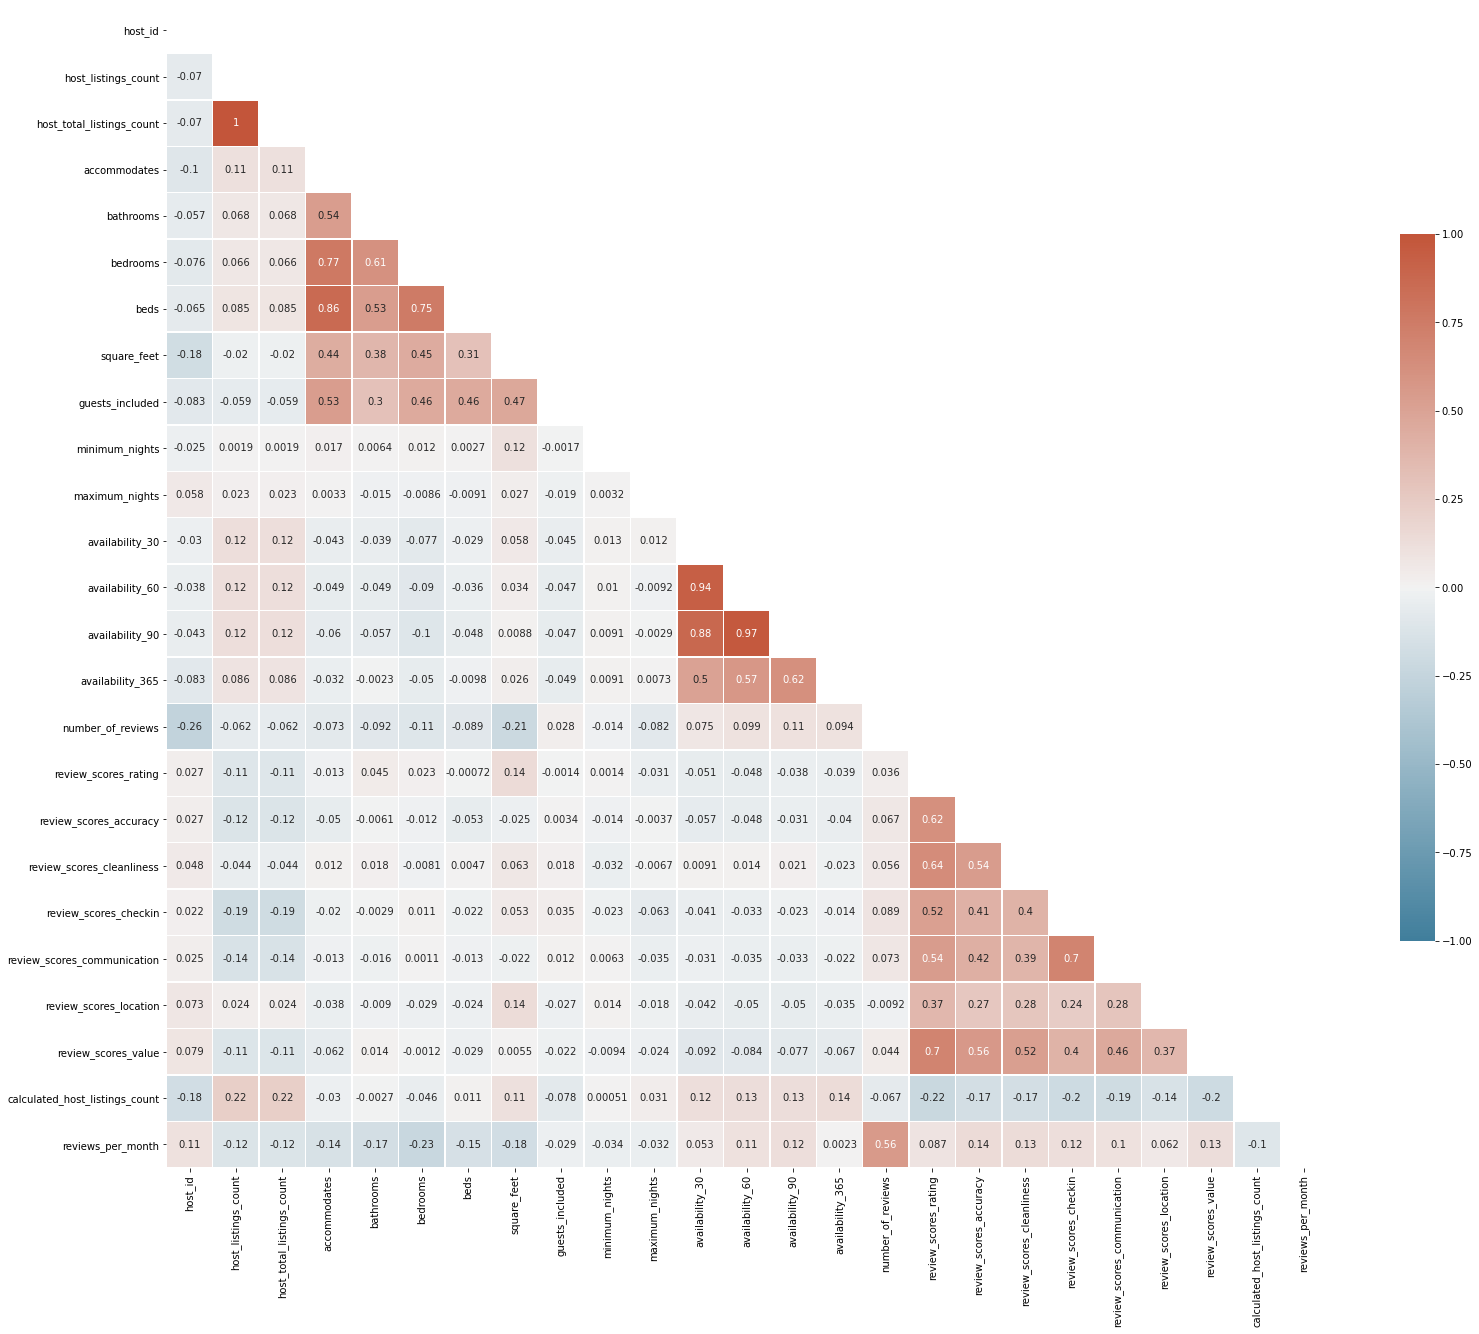

In [181]:
corr=listing_df.corr() # Calculates correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(26, 26))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,vmin=-1,
            annot=True,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [182]:
listing_df=listing_df.drop(columns=['host_total_listings_count','accommodates','availability_60','availability_90'])

In [183]:
listing_df=listing_df.dropna(subset=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'])

In [184]:
listing_df.head()

,host_id,host_since,host_response_time,host_response_rate,host_about,host_acceptance_rate,host_is_superhost,room_type,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,is_location_exact,property_type,room_type,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,instant_bookable,requires_license,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,956883,2011-08-11,within a few hours,96%,"I am an artist, interior designer, and run a s...",100%,f,Entire home/apt,Queen Anne,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,f,f,2,4.07
1,5177328,2013-02-21,within an hour,98%,Living east coast/left coast/overseas. Time i...,100%,t,Entire home/apt,Queen Anne,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,t,t,6,1.48
2,16708587,2014-06-12,within a few hours,67%,i love living in Seattle. i grew up in the mi...,100%,f,Entire home/apt,Queen Anne,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$975.00,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,f,f,2,1.15
4,1452570,2011-11-29,within an hour,100%,"Hi, I live in Seattle, Washington but I'm orig...",NaN,f,Entire home/apt,Queen Anne,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$450.00,NaN,NaN,$700.00,$125.00,6,$15.00,1,1125,7 weeks ago,t,30,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,f,f,f,f,1,0.89
5,326758,2010-12-25,NaN,NaN,I've been fortunate to have had many life expe...,NaN,f,Private room,Queen Anne,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,West Queen Anne,Queen Anne,98119,t,House,Private room,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",NaN,$120.00,$800.00,NaN,NaN,$40.00,1,$30.00,1,6,2 weeks ago,t,0,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,f,f,1,2.45


In [185]:
listing_df=listing_df.drop(columns=['square_feet','weekly_price','monthly_price','security_deposit','host_about','host_verifications','security_deposit','host_id'])

In [186]:
from datetime import datetime
from datetime import date
listing_df['days_since_host']=(datetime.today()- pd.to_datetime(listing_df['host_since'])).dt.days
listing_df=listing_df.drop(columns=['host_since'])

In [188]:
s = listing_df['host_response_rate'].str.replace(r'%', r'').astype('float')/100
listing_df['host_response_rate'] = pd.to_numeric(listing_df['host_response_rate'], errors='coerce').fillna(s)

In [189]:
s = listing_df['host_acceptance_rate'].str.replace(r'%', r'').astype('float')/100
listing_df['host_acceptance_rate'] = pd.to_numeric(listing_df['host_acceptance_rate'], errors='coerce').fillna(s)

In [190]:
listing_df['price'] = listing_df['price'].apply(clean_currency).astype('float')
listing_df['cleaning_fee'] = listing_df['cleaning_fee'].apply(clean_currency).astype('float')
listing_df['extra_people'] = listing_df['extra_people'].apply(clean_currency).astype('float')


In [191]:
listing_df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,room_type,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,is_location_exact,property_type,room_type,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,instant_bookable,requires_license,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,days_since_host
0,within a few hours,0.96,1.0,f,Entire home/apt,Queen Anne,3.0,t,t,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,NaN,2,5.0,1,365,4 weeks ago,t,14,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,f,f,2,4.07,3635
1,within an hour,0.98,1.0,t,Entire home/apt,Queen Anne,6.0,t,t,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,40.0,1,0.0,2,90,today,t,13,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,t,t,6,1.48,3075
2,within a few hours,0.67,1.0,f,Entire home/apt,Queen Anne,2.0,t,t,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,300.0,10,25.0,4,30,5 weeks ago,t,1,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,f,f,2,1.15,2599
4,within an hour,1.00,NaN,f,Entire home/apt,Queen Anne,2.0,t,t,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,125.0,6,15.0,1,1125,7 weeks ago,t,30,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,f,f,f,f,1,0.89,3525
5,NaN,NaN,NaN,f,Private room,Queen Anne,1.0,t,t,West Queen Anne,Queen Anne,98119,t,House,Private room,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",120.0,40.0,1,30.0,1,6,2 weeks ago,t,0,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,f,f,1,2.45,3864


<AxesSubplot:>

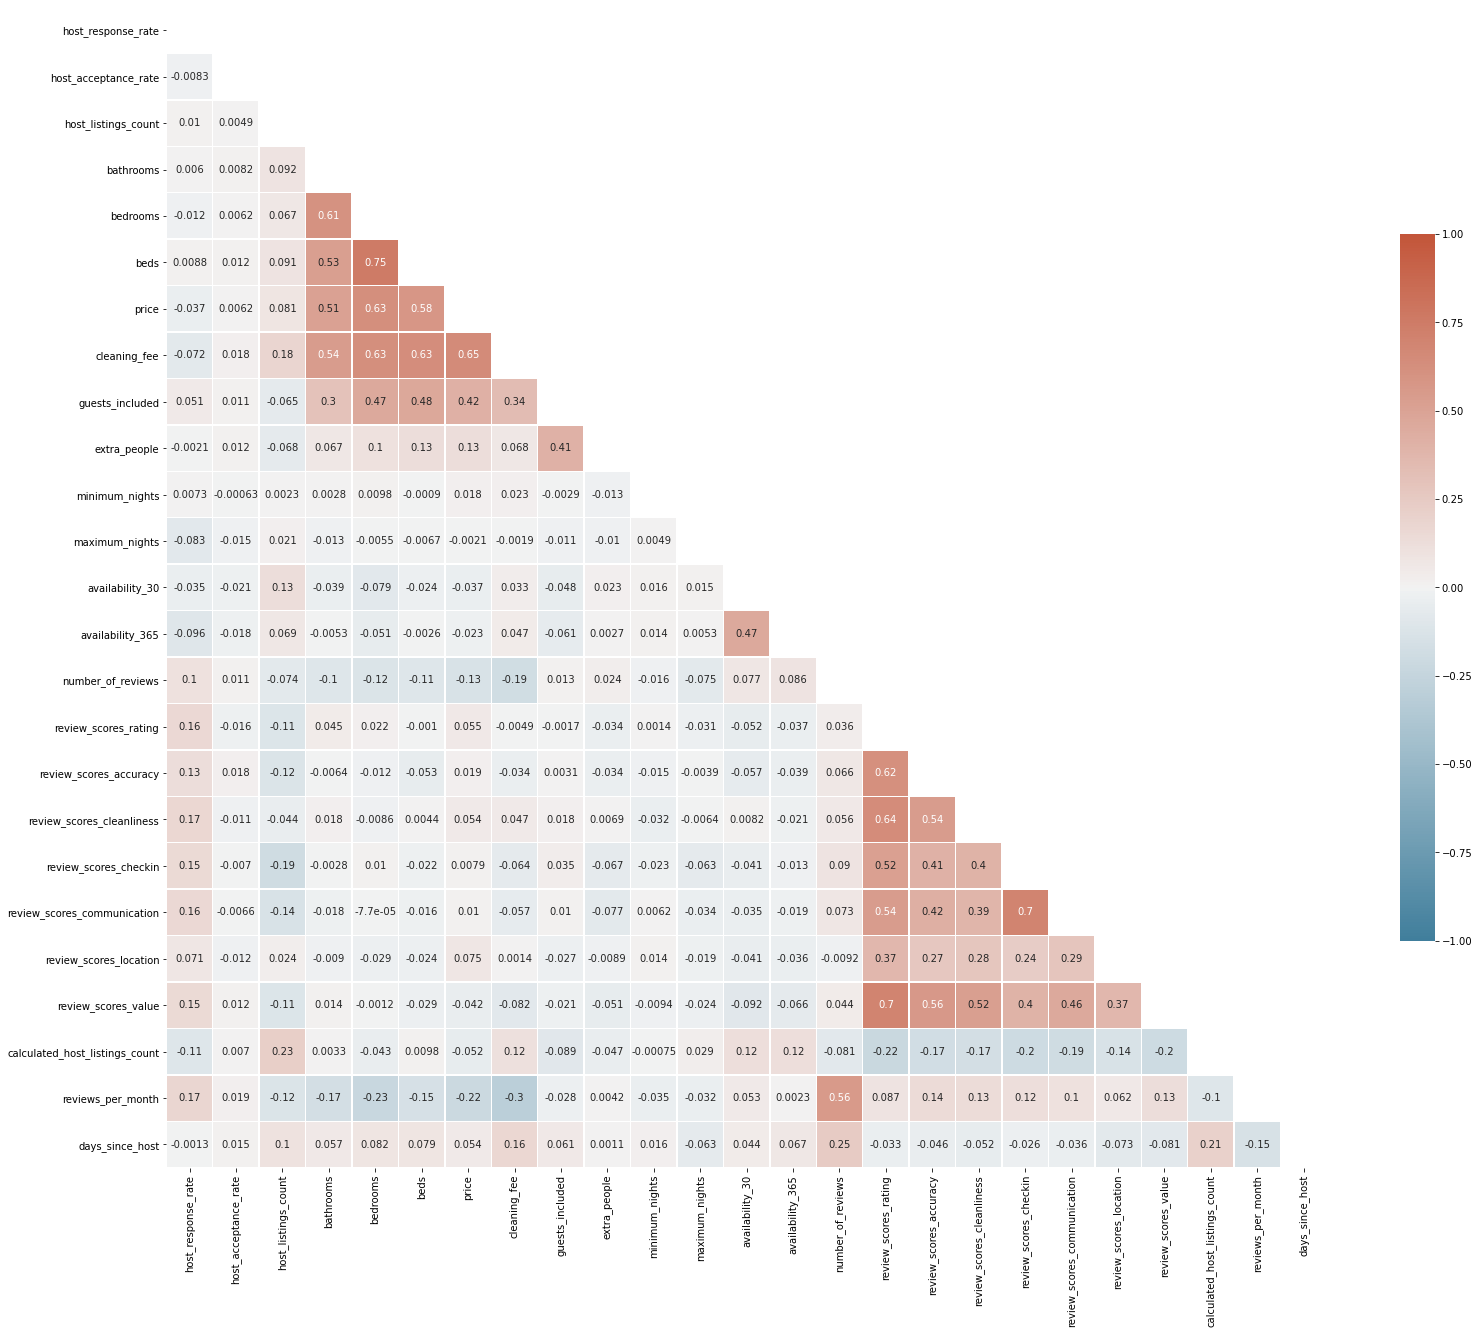

In [192]:
corr=listing_df.corr() # Calculates correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(26, 26))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,vmin=-1,
            annot=True,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [193]:
listing_df_comb = pd.concat([listing_df, listing_df['amenities'].str.get_dummies(sep=',').add_prefix('amenities_')], axis = 1).drop(['amenities','amenities_{}'], 1)


In [194]:
def create_dummy_df(df, cat_cols,num_cols, dummy_na):

        for col in cat_cols:
            try:
                df=pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col],prefix=col,drop_first=True,dummy_na=dummy_na)],axis=1)
            except:
                continue
                
        for col in num_cols:
            try:
                fill_mean = lambda col: col.fillna(col.mean())
                df=pd.concat([df.drop(col, axis=1),df[[col]].apply(fill_mean, axis=0)],axis=1)
            except:
                continue
        return df

In [195]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    df=df.dropna(subset=['review_scores_rating'])
    y=df['review_scores_rating']
    X=df.drop(columns=['review_scores_rating'])
    X=X.drop(columns=['calendar_updated'])
    
    cat_df = X.select_dtypes(include=['object']).copy()
    cat_cols_lst = cat_df.columns
    
    num_df = X.select_dtypes(include=['float64','int64']).copy()
    num_cols_lst = num_df.columns
    
    X = create_dummy_df(X, cat_cols_lst, num_cols_lst,dummy_na=False) #Use your newly created function


    
    
    return X, y
    
#Use the function to create X and y
X, y = clean_data(listing_df_comb)    

In [196]:
X.head()

,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,room_type_Private room,room_type_Shared room,room_type_Private room,room_type_Shared room,host_neighbourhood_Anaheim,host_neighbourhood_Arbor Heights,host_neighbourhood_Atlantic,host_neighbourhood_Baldwin Hills,host_neighbourhood_Ballard,host_neighbourhood_Belltown,host_neighbourhood_Bitter Lake,host_neighbourhood_Brighton,host_neighbourhood_Broadview,host_neighbourhood_Broadway,host_neighbourhood_Bryant,host_neighbourhood_Capitol Hill,host_neighbourhood_Cedar Park,host_neighbourhood_Central Business District,host_neighbourhood_Central San Pedro,host_neighbourhood_Clairemont Mesa East,host_neighbourhood_Columbia City,host_neighbourhood_Crown Hill,host_neighbourhood_Dunlap,host_neighbourhood_East Village,host_neighbourhood_Eastlake,host_neighbourhood_Fauntleroy,host_neighbourhood_Fenway/Kenmore,host_neighbourhood_First Hill,host_neighbourhood_Forestland,host_neighbourhood_Fremont,host_neighbourhood_Gatewood,host_neighbourhood_Genesee,host_neighbourhood_Georgetown,host_neighbourhood_Green Lake,host_neighbourhood_Greenwood,host_neighbourhood_Haller Lake,host_neighbourhood_Harrison/Denny-Blaine,host_neighbourhood_Hell's Kitchen,host_neighbourhood_High Point,host_neighbourhood_Highland Park,host_neighbourhood_Holly,host_neighbourhood_Holly Park,host_neighbourhood_Hollywood,host_neighbourhood_Industrial District,host_neighbourhood_Interbay,host_neighbourhood_International District,host_neighbourhood_Jamaica Plain,host_neighbourhood_Kaanapali,host_neighbourhood_Laurelhurst,host_neighbourhood_Leschi,host_neighbourhood_Licton Springs,host_neighbourhood_Long Beach,host_neighbourhood_Lower Queen Anne,host_neighbourhood_Madison Park,host_neighbourhood_Madrona,host_neighbourhood_Magnolia,host_neighbourhood_Manhattan Beach,host_neighbourhood_Maple Leaf,host_neighbourhood_Mathews Beach,host_neighbourhood_Meadowbrook,host_neighbourhood_Minor,host_neighbourhood_Mission District,host_neighbourhood_Montlake,host_neighbourhood_Mount Baker,host_neighbourhood_North Admiral,host_neighbourhood_North Beach/Blue Ridge,host_neighbourhood_North Beacon Hill,host_neighbourhood_North Delridge,host_neighbourhood_Northwest District,host_neighbourhood_Olympic Hills,host_neighbourhood_Phinney Ridge,host_neighbourhood_Pike Place Market,host_neighbourhood_Pinehurst,host_neighbourhood_Pioneer Square,host_neighbourhood_Portage Bay,host_neighbourhood_Queen Anne,host_neighbourhood_Rainier Beach,host_neighbourhood_Ravenna,host_neighbourhood_Riverview,host_neighbourhood_Roosevelt,host_neighbourhood_Roxhill,host_neighbourhood_Seaview,host_neighbourhood_Seward Park,host_neighbourhood_South Beacon Hill,host_neighbourhood_South Delridge,host_neighbourhood_South Lake Union,host_neighbourhood_South Park,host_neighbourhood_Stevens,host_neighbourhood_The Junction,host_neighbourhood_University District,host_neighbourhood_Victory Heights,host_neighbourhood_View Ridge,host_neighbourhood_Waianae Coast,host_neighbourhood_Wallingford,host_neighbourhood_Wedgewood,host_neighbourhood_Westlake,host_neighbourhood_Windermere,host_neighbourhood_Yesler Terrace,host_has_profile_pic_t,host_identity_verified_t,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Gen

In [200]:
sum(np.sum(X.isnull())>0)

0

In [201]:
y.head()

0    95.0
1    96.0
2    97.0
4    92.0
5    95.0
Name: review_scores_rating, dtype: float64

## Linear Regression

In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics as metrics

In [312]:
listing_df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,room_type,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,is_location_exact,property_type,room_type,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,instant_bookable,requires_license,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,days_since_host
0,within a few hours,0.96,1.0,f,Entire home/apt,Queen Anne,3.0,t,t,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,NaN,2,5.0,1,365,4 weeks ago,t,14,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,f,f,2,4.07,3635
1,within an hour,0.98,1.0,t,Entire home/apt,Queen Anne,6.0,t,t,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,40.0,1,0.0,2,90,today,t,13,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,t,t,6,1.48,3075
2,within a few hours,0.67,1.0,f,Entire home/apt,Queen Anne,2.0,t,t,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,300.0,10,25.0,4,30,5 weeks ago,t,1,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,f,f,2,1.15,2599
4,within an hour,1.00,NaN,f,Entire home/apt,Queen Anne,2.0,t,t,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,125.0,6,15.0,1,1125,7 weeks ago,t,30,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,f,f,f,f,1,0.89,3525
5,NaN,NaN,NaN,f,Private room,Queen Anne,1.0,t,t,West Queen Anne,Queen Anne,98119,t,House,Private room,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",120.0,40.0,1,30.0,1,6,2 weeks ago,t,0,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,f,f,1,2.45,3864


In [313]:
listing_df_lm_reduced=listing_df.drop(['amenities','has_availability','availability_30','availability_365',
                                       'number_of_reviews','reviews_per_month'],axis=1)

In [404]:
listing_df_lm_reduced=listing_df[['host_response_rate','host_response_time','price',
                                  'require_guest_phone_verification','cancellation_policy','host_acceptance_rate',
                                  'host_is_superhost','days_since_host','host_has_profile_pic',
                                  'review_scores_rating',
                                 'require_guest_profile_picture','instant_bookable',
                                 'bed_type',
                                  'host_listings_count']]

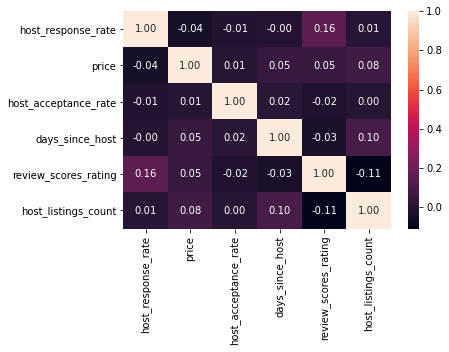

In [405]:
sns.heatmap(listing_df_lm_reduced.corr(), annot=True, fmt=".2f");

In [406]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    df=df.dropna(subset=['review_scores_rating'])
    y=df['review_scores_rating']
    X=df.drop(columns=['review_scores_rating'])
    
    '''X=X.drop(columns=['calendar_updated','beds','review_scores_accuracy','review_scores_cleanliness',
                      'review_scores_checkin','review_scores_communication','review_scores_location',
                      'review_scores_value','neighbourhood_cleansed','neighbourhood_group_cleansed',
                     'zipcode','host_neighbourhood'])
                     '''
    
    cat_df = X.select_dtypes(include=['object']).copy()
    cat_cols_lst = cat_df.columns
    
    num_df = X.select_dtypes(include=['float64','int64']).copy()
    num_cols_lst = num_df.columns
    
    X = create_dummy_df(X, cat_cols_lst, num_cols_lst,dummy_na=False) #Use your newly created function


    
    
    return X, y
    
#Use the function to create X and y
X, y = clean_data(listing_df_lm_reduced) 

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [516]:
print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)

(2210, 49)
(2210,)
(948, 49)
(948,)


In [409]:
X_train.head()

,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,require_guest_phone_verification_t,cancellation_policy_moderate,cancellation_policy_strict,host_is_superhost_t,host_has_profile_pic_t,require_guest_profile_picture_t,instant_bookable_t,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,host_response_rate,price,host_acceptance_rate,days_since_host,host_listings_count
896,0,0,1,0,0,1,1,1,0,0,0,0,0,1,0.830000,108.0,1.000000,2410,4.0
3102,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.952114,93.0,0.999628,2429,1.0
796,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0.900000,42.0,1.000000,3582,37.0
571,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0.910000,65.0,1.000000,2085,1.0
954,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0.750000,150.0,0.999628,2593,1.0


In [414]:
clf = LinearRegression(normalize=True)
clf.fit(X_train,y_train)

LinearRegression(normalize=True)

In [415]:
y_test_preds = clf.predict(X_test)

In [421]:
print(r2_score(y_train, clf.predict(X_train)))
print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.0961159863331561
0.0755348703226566
36.27469812479384


In [417]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = clf.coef_
    coefs_df['abs_coefs'] = np.abs(clf.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(clf.coef_, X_train)

#A quick look at the top results
coef_df.sort_values('coefs', ascending=False)

,est_int,coefs,abs_coefs
14,host_response_rate,5.589919,5.589919
6,host_is_superhost_t,3.715142,3.715142
12,bed_type_Pull-out Sofa,1.729837,1.729837
11,bed_type_Futon,1.416249,1.416249
13,bed_type_Real Bed,1.274561,1.274561
0,host_response_time_within a day,1.002846,1.002846
3,require_guest_phone_verification_t,0.856751,0.856751
2,host_response_time_within an hour,0.699107,0.699107
15,price,0.008112,0.008112
17,days_since_host,0.000124,0.000124


In [425]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train)
results = sm.OLS(y_train,X_train_new).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.096
Model:                              OLS   Adj. R-squared:                  0.088
Method:                   Least Squares   F-statistic:                     12.26
Date:                  Sat, 24 Jul 2021   Prob (F-statistic):           1.27e-36
Time:                          21:23:59   Log-Likelihood:                -7237.5
No. Observations:                  2210   AIC:                         1.451e+04
Df Residuals:                      2190   BIC:                         1.463e+04
Df Model:                            19                                         
Covariance Type:              nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    94.9084      7.625     12.447      0.000      79.956     109.861
host_response_time_within a day           1.0028      0.549      1.827      0.068      -0.074       2.079
host_response_time_within a few hours    -0.3265      0.507     -0.644      0.520      -1.321       0.668
host_response_time_within an hour         0.6991      0.499      1.401      0.161      -0.279       1.677
require_guest_phone_verification_t        0.8568      0.896      0.956      0.339      -0.901       2.614
cancellation_policy_moderate             -0.9605      0.368     -2.614      0.009      -1.681      -0.240
cancellation_policy_strict               -1.4652      0.386     -3.798      0.000      -2.222      -0.709
host_is_superhost_t                       3.7151      0.334     11.127      0.000       3.060       4.370
host_has_profile_pic_t                   -2.8749      2.882     -0.998      0.319      -8.526       2.777
require_guest_profile_picture_t          -0.8903      0.939     -0.948      0.343      -2.732       0.952
instant_bookable_t                       -0.4764      0.385     -1.237      0.216      -1.231       0.279
bed_type_Couch                           -1.4538      3.428     -0.424      0.672      -8.176       5.268
bed_type_Futon                            1.4162      2.128      0.666      0.506      -2.756       5.589
bed_type_Pull-out Sofa                    1.7298      2.262      0.765      0.444      -2.705       6.165
bed_type_Real Bed                         1.2746      1.871      0.681      0.496      -2.394       4.943
host_response_rate                        5.5899      1.412      3.960      0.000       2.821       8.358
price                                     0.0081      0.002      5.057      0.000       0.005       0.011
host_acceptance_rate                     -5.7302      6.584     -0.870      0.384     -18.641       7.181
days_since_host                           0.0001      0.000      0.466      0.641      -0.000       0.001
host_listings_count                      -0.0246      0.006     -4.390      0.000      -0.036      -0.014
==============================================================================
Omnibus:                     1537.519   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35114.403
Skew:                          -2.979   Prob(JB):                         0.00
Kurtosis:                      21.596   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This

## Gradiant Boost

In [489]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance

In [490]:
listing_df_comb.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,room_type,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,is_location_exact,property_type,room_type,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,instant_bookable,requires_license,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,days_since_host,"amenities_""24-Hour Check-in""","amenities_""24-Hour Check-in""}","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Carbon Monoxide Detector""}","amenities_""Elevator in Building""","amenities_""Elevator in Building""}","amenities_""Family/Kid Friendly""","amenities_""Family/Kid Friendly""}","amenities_""Fire Extinguisher""","amenities_""Fire Extinguisher""}","amenities_""First Aid Kit""","amenities_""First Aid Kit""}","amenities_""Free Parking on Premises""","amenities_""Hair Dryer""","amenities_""Hair Dryer""}","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Indoor Fireplace""}","amenities_""Laptop Friendly Workspace""}","amenities_""Lock on Bedroom Door""","amenities_""Lock on Bedroom Door""}","amenities_""Other pet(s)""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Safety Card""}","amenities_""Smoke Detector""","amenities_""Smoke Detector""}","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Suitable for Events""}","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""Wireless Internet""}",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Dryer},amenities_Essentials,amenities_Essentials},amenities_Gym,amenities_Hangers,amenities_Hangers},amenities_Heating,amenities_Heating},amenities_Internet,amenities_Iron,amenities_Iron},amenities_Kitchen,amenities_Kitchen},amenities_Pool,amenities_Shampoo,amenities_Shampoo},amenities_Washer,amenities_Washer},"amenities_{""Cable TV""","amenities_{""Elevator in Building""","amenities_{""Free Parking on Premises""","amenities_{""Wheelchair Accessible""","amenities_{""Wireless Internet""",amenities_{Internet,amenities_{Kitchen,amenities_{Kitchen},amenities_{Pool,amenities_{TV
0,within a few hours,0.96,1.0,f,Entire home/apt,Queen Anne,3.0,t,t,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,85.0,NaN,2,5.0,1,365,4 weeks ago,t,14,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,f,f,2,4.07,3635,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,within an hour,0.98,1.0,t,Entire home/apt,Queen Anne,6.0,t,t,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,150.0,40.0,1,0.0,2,90,today,t,13,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,t,t,6,1.48,3075,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,within a few hours,0.67,1.0,f,Entire home/apt,Queen Anne,2.0,t,t,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,4.5,5.0,7.0,Real Bed,975.0,300.0,10,25.0,4,30,5 weeks ago,t,1,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,f,f,2,1.15,2599,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4,within an hour,1.00,NaN

In [543]:
listing_df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,room_type,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,is_location_exact,property_type,room_type,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,instant_bookable,requires_license,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,days_since_host
0,within a few hours,0.96,1.0,f,Entire home/apt,Queen Anne,3.0,t,t,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,NaN,2,5.0,1,365,4 weeks ago,t,14,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,f,f,f,f,2,4.07,3635
1,within an hour,0.98,1.0,t,Entire home/apt,Queen Anne,6.0,t,t,West Queen Anne,Queen Anne,98119,t,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,40.0,1,0.0,2,90,today,t,13,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,t,t,6,1.48,3075
2,within a few hours,0.67,1.0,f,Entire home/apt,Queen Anne,2.0,t,t,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,300.0,10,25.0,4,30,5 weeks ago,t,1,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,f,f,2,1.15,2599
4,within an hour,1.00,NaN,f,Entire home/apt,Queen Anne,2.0,t,t,West Queen Anne,Queen Anne,98119,t,House,Entire home/apt,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,125.0,6,15.0,1,1125,7 weeks ago,t,30,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict,f,f,f,f,1,0.89,3525
5,NaN,NaN,NaN,f,Private room,Queen Anne,1.0,t,t,West Queen Anne,Queen Anne,98119,t,House,Private room,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",120.0,40.0,1,30.0,1,6,2 weeks ago,t,0,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,f,f,f,f,1,2.45,3864


In [544]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    df=df.dropna(subset=['review_scores_rating'])
    y=df['review_scores_rating']
    X=df.drop(columns=['review_scores_rating'])
    
    X=X.drop(columns=['review_scores_accuracy','review_scores_cleanliness',
                      'review_scores_checkin','review_scores_communication','review_scores_location',
                      'review_scores_value','neighbourhood_cleansed','neighbourhood_group_cleansed',
                     'zipcode','host_neighbourhood',
                     'has_availability','availability_30','availability_365',
                                       'number_of_reviews','reviews_per_month','calendar_updated','amenities'])
                     
    #'calendar_updated','beds'
    
    cat_df = X.select_dtypes(include=['object']).copy()
    cat_cols_lst = cat_df.columns
    
    num_df = X.select_dtypes(include=['float64','int64']).copy()
    num_cols_lst = num_df.columns
    
    X = create_dummy_df(X, cat_cols_lst, num_cols_lst,dummy_na=False) #Use your newly created function


    
    
    return X, y
    
#Use the function to create X and y
X_2, y_2 = clean_data(listing_df) 

In [549]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2, test_size=0.3, random_state=42)

params = {'n_estimators': 220,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [550]:
print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)

(2210, 49)
(2210,)
(948, 49)
(948,)


In [551]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train_2, y_train_2)

mse = mean_squared_error(y_test_2, reg.predict(X_test_2))
y_pred_2=reg.predict(X_test_2)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 33.4648


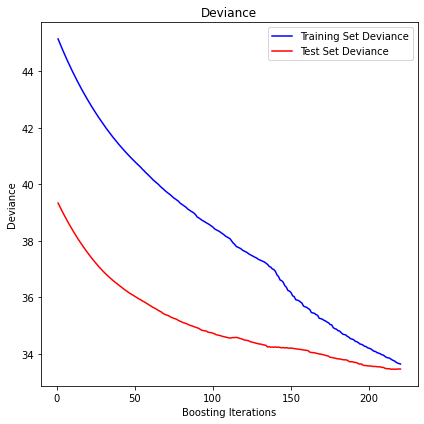

In [552]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred_2 in enumerate(reg.staged_predict(X_test_2)):
    test_score[i] = reg.loss_(y_test_2, y_pred_2)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

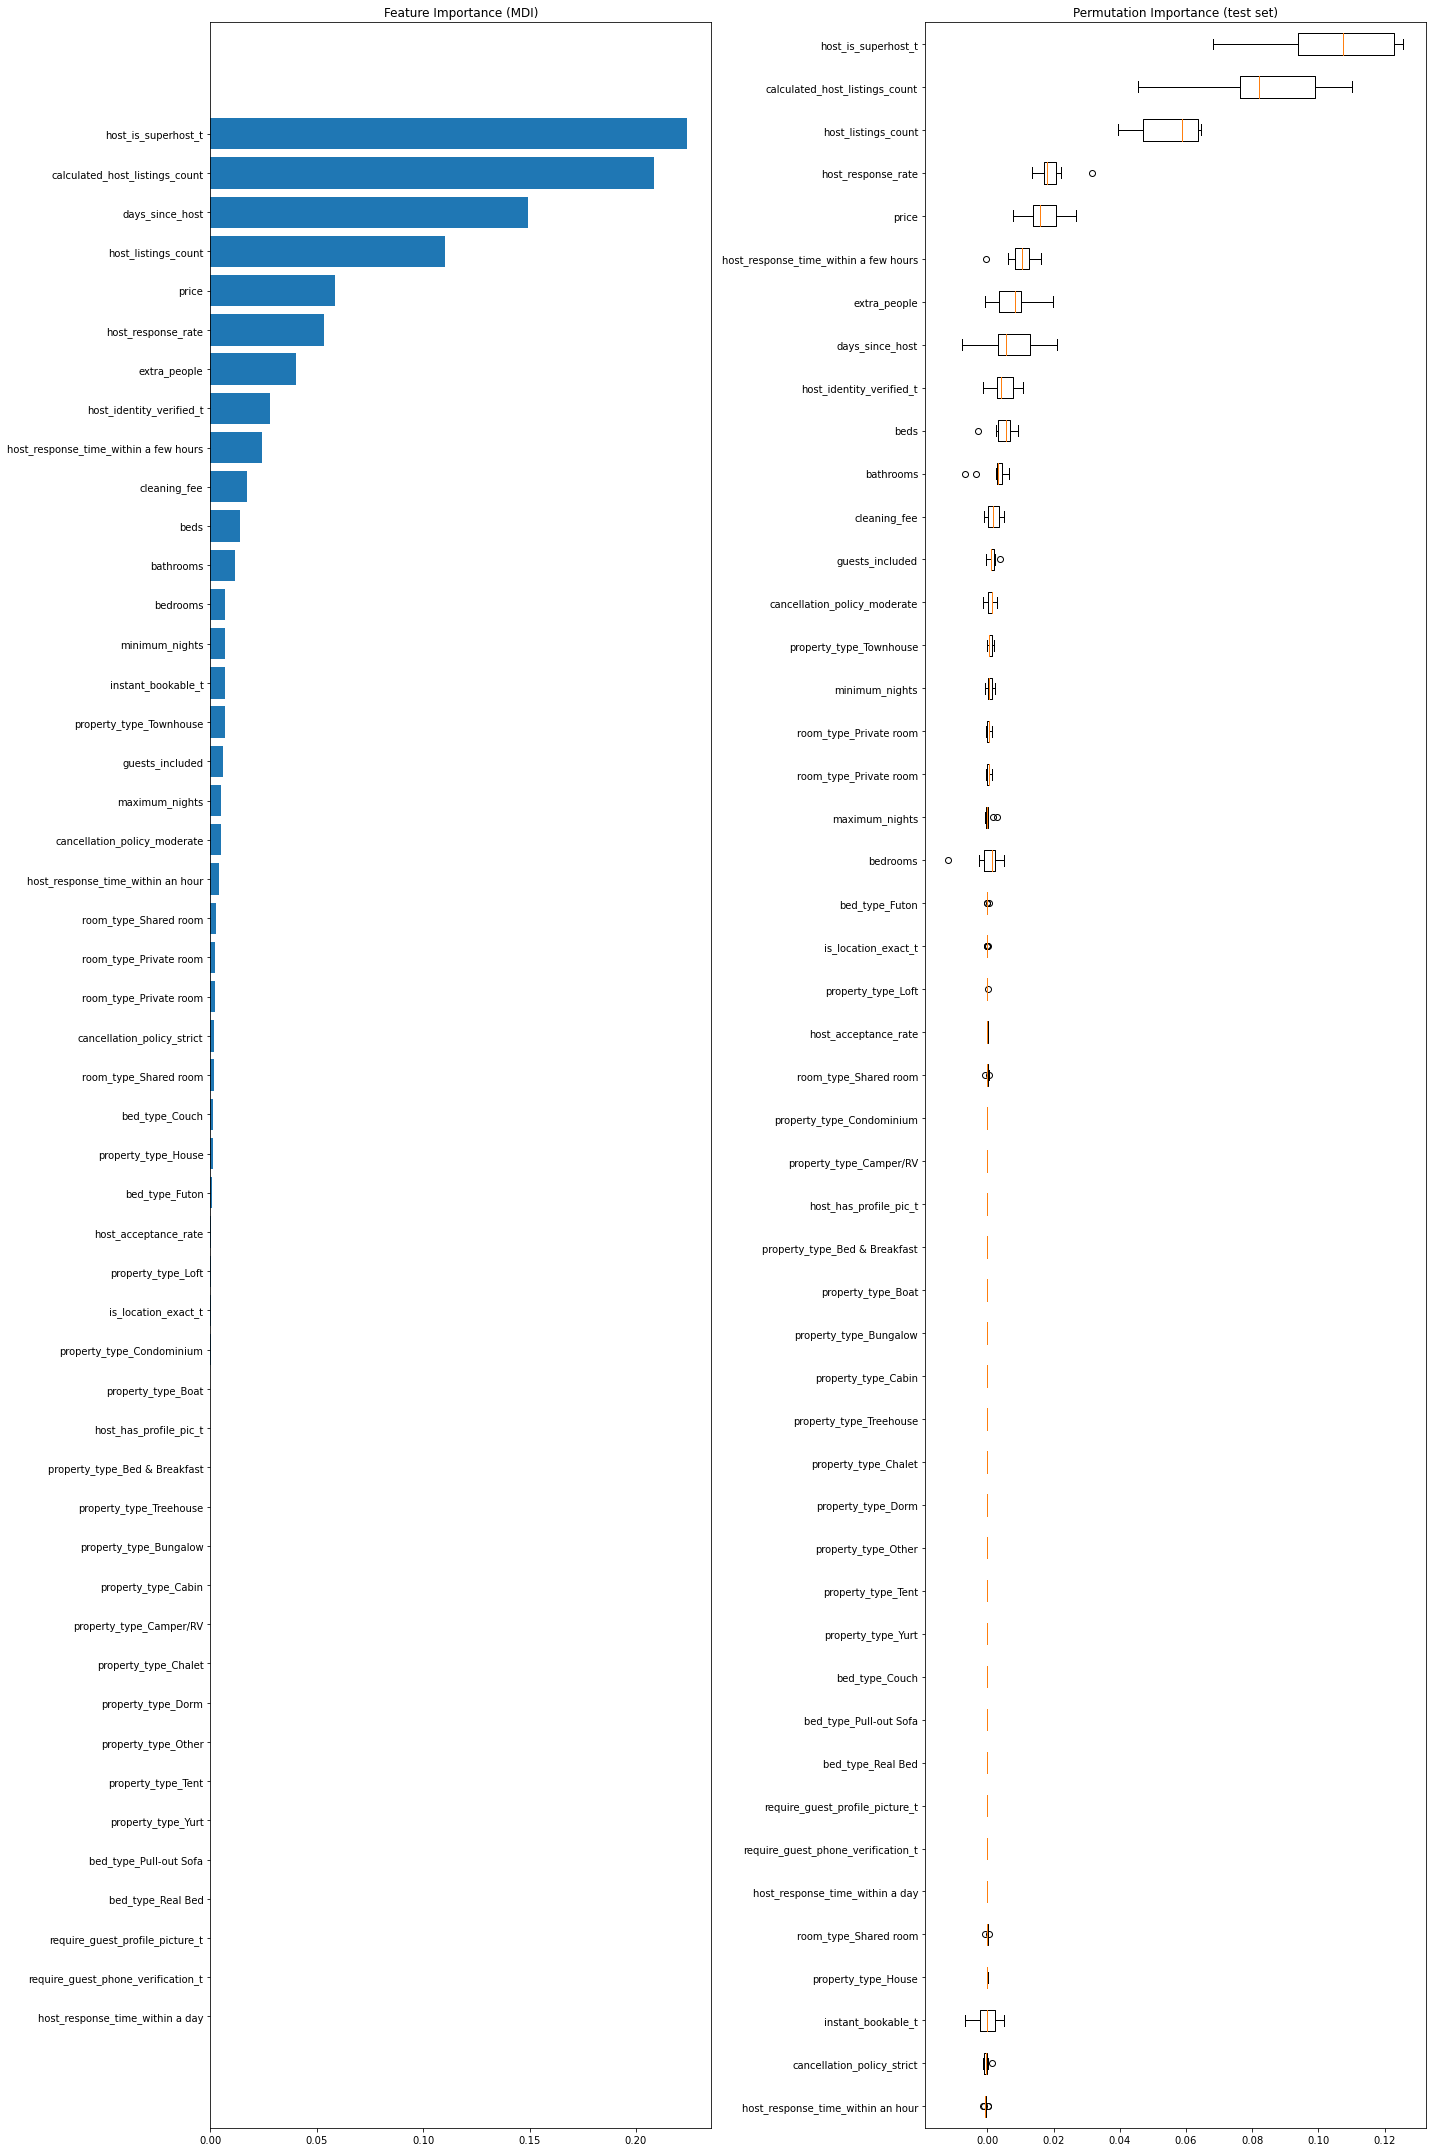

In [553]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(20, 30))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train_2.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(reg, X_test_2, y_test_2, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X_train_2.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()